## Loading basic Python and R imports

In [22]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Answer the questions below. Explain your reasoning. 

In [23]:
%%R

require('tidyverse')

## Part 1 | mtcars

### 👉 Question 1: Are automatic cars more fuel efficent than manual cars?

1. Formulate a null hypothesis (H0) and an alternate hypothesis (Ha)
2. Plot the data
3. Apply a t-test
4. Interpret the result 
5. For yourself (using statsy language like "reject the null hypothesis that TKTK" or "fail to reject the null hypothesis that TKTK")
6. For the reader (how would you explain the result to a reader?)




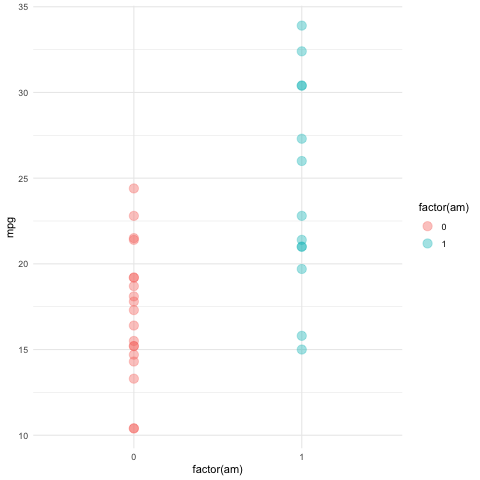

In [24]:
%%R -o mtcars

# R cell

ggplot(mtcars) +
    aes(x=factor(am), y=mpg, color=factor(am)) +
    geom_point(size=4, alpha=.4) +
    theme_minimal()

In [25]:
# python cell
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
Mazda RX4 Wag,21.0,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
Datsun 710,22.8,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
Hornet 4 Drive,21.4,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
Hornet Sportabout,18.7,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0
Valiant,18.1,6.0,225.0,105.0,2.76,3.460,20.22,1.0,0.0,3.0,1.0
Duster 360,14.3,8.0,360.0,245.0,3.21,3.570,15.84,0.0,0.0,3.0,4.0
Merc 240D,24.4,4.0,146.7,62.0,3.69,3.190,20.00,1.0,0.0,4.0,2.0
Merc 230,22.8,4.0,140.8,95.0,3.92,3.150,22.90,1.0,0.0,4.0,2.0
Merc 280,19.2,6.0,167.6,123.0,3.92,3.440,18.30,1.0,0.0,4.0,4.0


### 👉 Question 2: Are automatic cars faster than manual cars?


1. Formulate a null hypothesis (H0) and an alternate hypothesis (Ha)
2. Plot the data
3. Apply a t-test
4. Interpret the result 
5. For yourself (using statsy language like "reject the null hypothesis that TKTK" or "fail to reject the null hypothesis that TKTK")
6. For the reader (how would you explain the result to a reader?)




### 👉 Question 3: Are automatic cars heavier than manual cars?


1. Formulate a null hypothesis (H0) and an alternate hypothesis (Ha)
2. Plot the data
3. Apply a t-test
4. Interpret the result 
5. For yourself (using statsy language like "reject the null hypothesis that TKTK" or "fail to reject the null hypothesis that TKTK")
6. For the reader (how would you explain the result to a reader?)


